## Machine Learning Project - Credit Card Application

In [73]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
from scipy.stats.mstats import winsorize
from imblearn.over_sampling import RandomOverSampler,SMOTENC,SMOTE
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier,RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest,chi2 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

### DATAPREPROCESSING

In [74]:
#import dataset
df_application = pd.read_csv('application_record.csv')

In [75]:
#view top 10 rows
df_application.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [76]:
#view total number of rows and columns
df_application.shape

(438557, 18)

In [77]:
#view dataset information 
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [78]:
#view dataset unique values
df_application.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

<AxesSubplot:>

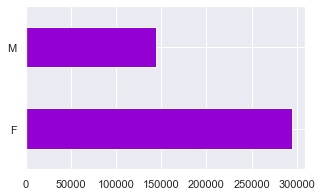

In [89]:
plt.figure(figsize=(5, 3))
df_application['CODE_GENDER'].value_counts().plot(kind='barh',color = 'darkviolet')

### Dropping Duplicates

In [21]:
df_application['ID'].duplicated().sum()

47

In [22]:
#drop duplicates in dataset
df_application.drop_duplicates(subset = 'ID')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


### DATAPREPROCESSING MISSING VALUES

In [23]:
#checking for nul values
df_application.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

<AxesSubplot:>

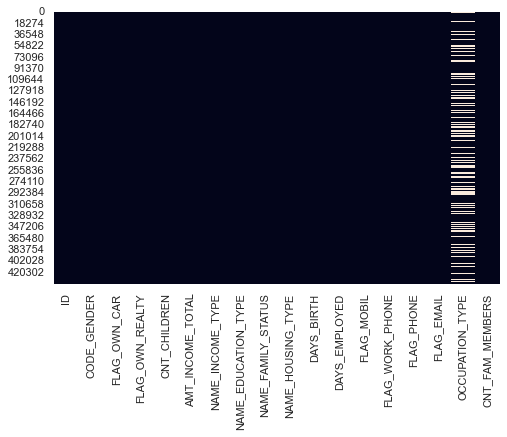

In [24]:
#ploting the nul values
fig = plt.figure(figsize = (8,5))
sns.heatmap(df_application.isnull(),cbar=False)

In [25]:
df_application[df_application['OCCUPATION_TYPE'].isna()].head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [26]:
#fill the missing value with value-"others"
df_application['OCCUPATION_TYPE'].fillna(value = 'Others', inplace = True)

<AxesSubplot:>

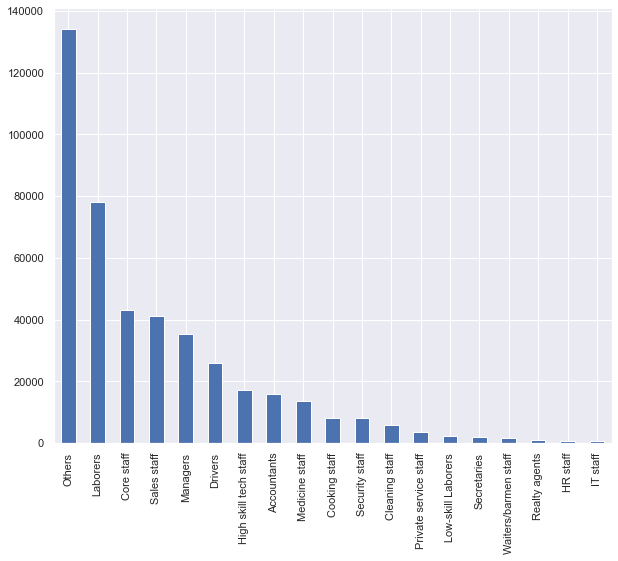

In [27]:
#visualise column OCCUPATION_TYPE
df_application['OCCUPATION_TYPE'].value_counts().plot.bar(y='OCCUPATION_TYPE')

### DATAPREPROCESSING- Handling Outliers

C:\Users\shan2\Anaconda3\envs\mylib\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

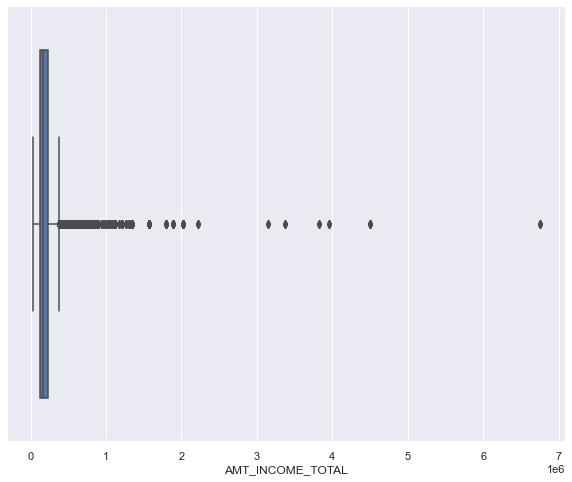

In [28]:
#visualise column AMT_INCOME_TOTAL for outliers
sns.boxplot(df_application['AMT_INCOME_TOTAL'])

In [29]:
#finding 95th percentile of column AMT_INCOME_TOTAL
df_application['AMT_INCOME_TOTAL'].quantile(0.95)

360000.0

In [30]:
#use winsorize to eliminate the 5 percent of outliers & create new column INCOME
df_application['INCOME'] = winsorize((df_application['AMT_INCOME_TOTAL']),limits = [0.05,0.05],inplace = True)

C:\Users\shan2\Anaconda3\envs\mylib\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='INCOME'>

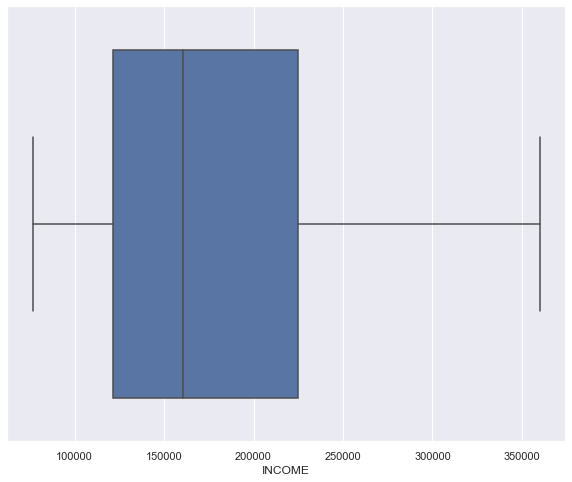

In [31]:
#visualise the column INCOME after winsorization 
sns.boxplot(df_application['INCOME'])

C:\Users\shan2\Anaconda3\envs\mylib\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CNT_FAM_MEMBERS'>

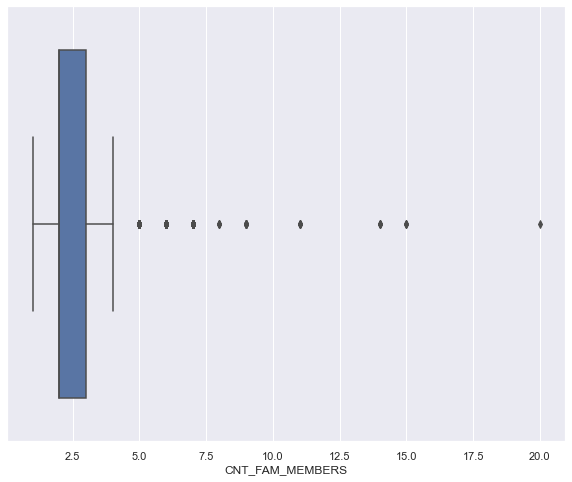

In [32]:
#visualise column CNT_FAM_MEMBERS for outliers
sns.boxplot(df_application['CNT_FAM_MEMBERS'])

In [33]:
#finding 99th percentile of column CNT_FAM_MEMBERS
df_application['CNT_FAM_MEMBERS'].quantile(0.99)

5.0

In [34]:
#use winsorize to eliminate the 5 percent of outliers & create new column FAMILY_MEMBERS
df_application['FAMILY_MEMBERS'] = winsorize((df_application['CNT_FAM_MEMBERS']),limits = [0.05,0.05],inplace = True)

C:\Users\shan2\Anaconda3\envs\mylib\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FAMILY_MEMBERS'>

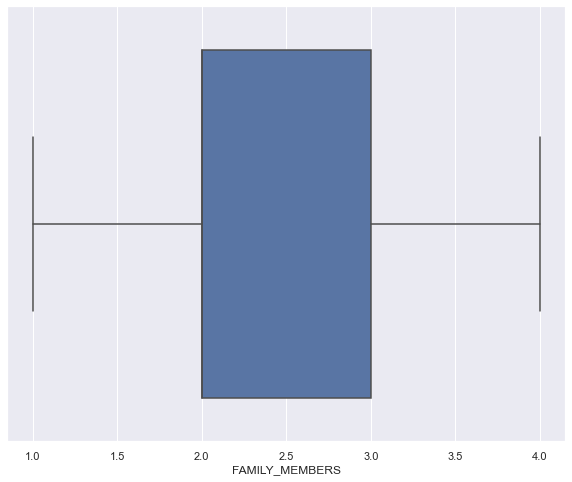

In [35]:
#visualise the column FAMILY_MEMBERS after winsorization
sns.boxplot(df_application['FAMILY_MEMBERS'])

C:\Users\shan2\Anaconda3\envs\mylib\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CNT_CHILDREN'>

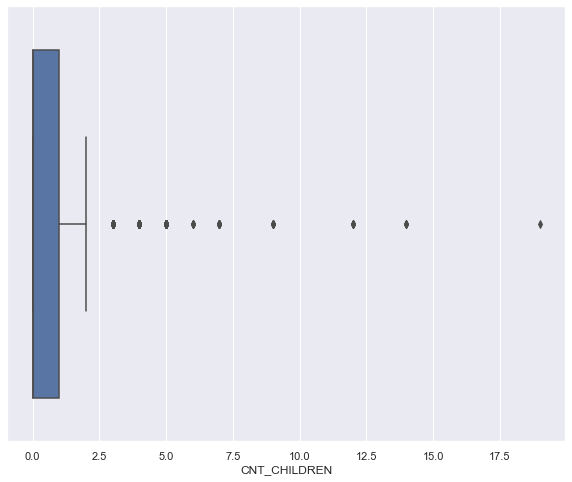

In [36]:
#visualising CNT_CHILDREN for outliers
sns.boxplot(df_application['CNT_CHILDREN'])

In [37]:
#use winsorize to eliminate the 5 percent of outliers & create new column NO_OF_CHILDREN
df_application['NO_OF_CHILDREN'] = winsorize((df_application['CNT_CHILDREN']),limits = [0.05,0.05],inplace = True)

C:\Users\shan2\Anaconda3\envs\mylib\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NO_OF_CHILDREN'>

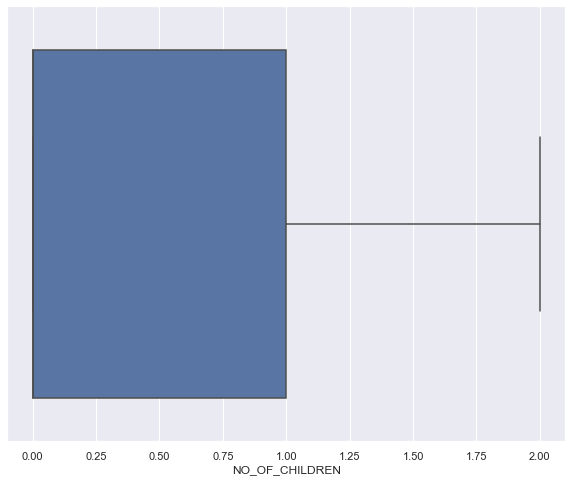

In [38]:
sns.boxplot(df_application['NO_OF_CHILDREN'])

In [39]:
#drop columns AMT_INCOME_TOTAL & CNT_FAM_MEMBERS
df_application.drop(['AMT_INCOME_TOTAL','CNT_FAM_MEMBERS','CNT_CHILDREN'],axis=1,inplace = True)

### DATAPREPROCESSING-Encoding Categorical Data Columns

In [40]:
df_application =pd.get_dummies(data = df_application, columns=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'],drop_first = True)
df_application

,ID,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,INCOME,FAMILY_MEMBERS,...,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,5008804,-12005,-4542,1,1,0,0,Others,360000.0,2.0,...,0,0,0,0,0,0,0,0,1,0
1,5008805,-12005,-4542,1,1,0,0,Others,360000.0,2.0,...,0,0,0,0,0,0,0,0,1,0
2,5008806,-21474,-1134,1,0,0,0,Security staff,112500.0,2.0,...,1,1,0,0,0,1,0,0,0,0
3,5008808,-19110,-3051,1,0,1,1,Sales staff,270000.0,1.0,...,1,0,0,1,0,1,0,0,0,0
4,5008809,-19110,-3051,1,0,1,1,Sales staff,270000.0,1.0,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,-22717,365243,1,0,0,0,Others,135000.0,1.0,...,1,0,1,0,0,1,0,0,0,0
438553,6840222,-15939,-3007,1,0,0,0,Laborers,103500.0,1.0,...,1,0,0,1,0,1,0,0,0,0
438554,6841878,-8169,-372,1,1,0,0,Sales staff,76500.0,1.0,...,0,0,0,1,0,0,0,0,0,1
438555,6842765,-21673,365243,1,0,0,0,Others,76500.0,2.0,...,1,1,0,0,0,1,0,0,0,0


### Feature Engineering

In [41]:
#create new column AGE columns from DAYS_BIRTH
df_application['AGE'] = -(df_application.DAYS_BIRTH/365).round(0)
df_application

,ID,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,INCOME,FAMILY_MEMBERS,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,AGE
0,5008804,-12005,-4542,1,1,0,0,Others,360000.0,2.0,...,0,0,0,0,0,0,0,1,0,33.0
1,5008805,-12005,-4542,1,1,0,0,Others,360000.0,2.0,...,0,0,0,0,0,0,0,1,0,33.0
2,5008806,-21474,-1134,1,0,0,0,Security staff,112500.0,2.0,...,1,0,0,0,1,0,0,0,0,59.0
3,5008808,-19110,-3051,1,0,1,1,Sales staff,270000.0,1.0,...,0,0,1,0,1,0,0,0,0,52.0
4,5008809,-19110,-3051,1,0,1,1,Sales staff,270000.0,1.0,...,0,0,1,0,1,0,0,0,0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,-22717,365243,1,0,0,0,Others,135000.0,1.0,...,0,1,0,0,1,0,0,0,0,62.0
438553,6840222,-15939,-3007,1,0,0,0,Laborers,103500.0,1.0,...,0,0,1,0,1,0,0,0,0,44.0
438554,6841878,-8169,-372,1,1,0,0,Sales staff,76500.0,1.0,...,0,0,1,0,0,0,0,0,1,22.0
438555,6842765,-21673,365243,1,0,0,0,Others,76500.0,2.0,...,1,0,0,0,1,0,0,0,0,59.0


In [42]:
#create new column EMPLOYMENT_YEARS columns from DAYS_EMPLOYED
df_application['EMPLOYMENT_YEARS'] = -(df_application.DAYS_EMPLOYED/365).round(0)
df_application

,ID,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,INCOME,FAMILY_MEMBERS,...,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,AGE,EMPLOYMENT_YEARS
0,5008804,-12005,-4542,1,1,0,0,Others,360000.0,2.0,...,0,0,0,0,0,0,1,0,33.0,12.0
1,5008805,-12005,-4542,1,1,0,0,Others,360000.0,2.0,...,0,0,0,0,0,0,1,0,33.0,12.0
2,5008806,-21474,-1134,1,0,0,0,Security staff,112500.0,2.0,...,0,0,0,1,0,0,0,0,59.0,3.0
3,5008808,-19110,-3051,1,0,1,1,Sales staff,270000.0,1.0,...,0,1,0,1,0,0,0,0,52.0,8.0
4,5008809,-19110,-3051,1,0,1,1,Sales staff,270000.0,1.0,...,0,1,0,1,0,0,0,0,52.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,-22717,365243,1,0,0,0,Others,135000.0,1.0,...,1,0,0,1,0,0,0,0,62.0,-1001.0
438553,6840222,-15939,-3007,1,0,0,0,Laborers,103500.0,1.0,...,0,1,0,1,0,0,0,0,44.0,8.0
438554,6841878,-8169,-372,1,1,0,0,Sales staff,76500.0,1.0,...,0,1,0,0,0,0,0,1,22.0,1.0
438555,6842765,-21673,365243,1,0,0,0,Others,76500.0,2.0,...,0,0,0,1,0,0,0,0,59.0,-1001.0


C:\Users\shan2\Anaconda3\envs\mylib\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EMPLOYMENT_YEARS'>

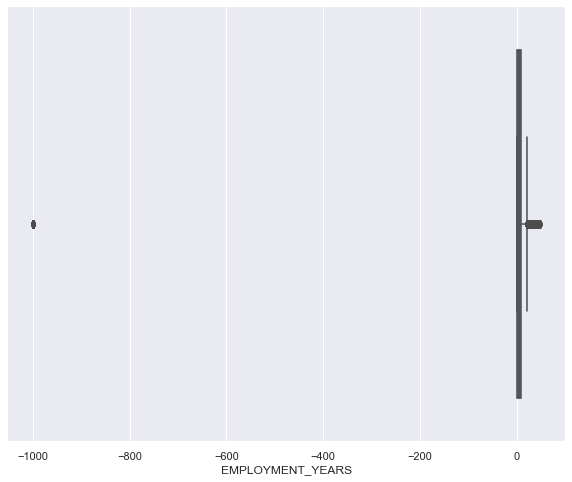

In [43]:
#visualising EMPLOYMENT_YEARS for outliers
sns.boxplot(df_application['EMPLOYMENT_YEARS'])

In [44]:
#finding 17.5th percentile of column EMPLOYMENT_YEARS
df_application['EMPLOYMENT_YEARS'].quantile(0.175)

0.0

In [45]:
#use winsorize to eliminate the 17.5 & 5 percent of outliers & create new column EMPLOYMENT_YEARS_WIN
df_application['EMPLOYMENT_YEARS_WIN'] = winsorize((df_application['EMPLOYMENT_YEARS']),limits = [0.175,0.05],inplace = True)

In [46]:
df_application['EMPLOYMENT_YEARS_WIN']

0         12.0
1         12.0
2          3.0
3          8.0
4          8.0
          ... 
438552     0.0
438553     8.0
438554     1.0
438555     0.0
438556     3.0
Name: EMPLOYMENT_YEARS_WIN, Length: 438557, dtype: float64

C:\Users\shan2\Anaconda3\envs\mylib\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EMPLOYMENT_YEARS_WIN'>

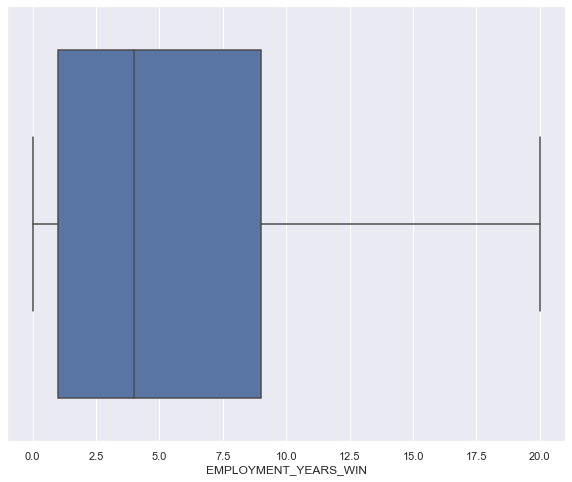

In [47]:
sns.boxplot(df_application['EMPLOYMENT_YEARS_WIN'])

In [48]:
#drop columns DAYS_BIRTH,DAYS_EMPLOYED,EMPLOYMENT_YEARS
df_application.drop(['DAYS_BIRTH','DAYS_EMPLOYED','EMPLOYMENT_YEARS'],axis =1,inplace= True)

### Binning the OCCUPATION_TYPE column

In [49]:
def job_cat(col):

    if col['OCCUPATION_TYPE'] in ['Security staff','Sales staff','Laborers','Drivers','Core staff','High skill tech staff', 'Cleaning staff', 'Private service staff',
           'Cooking staff', 'Low-skill Laborers','Waiters/barmen staff']:
        return('Operational & Technical')
    if col['OCCUPATION_TYPE'] in ['Accountants','Medicine staff','Secretaries','HR staff', 'Realty agents','IT staff']:
        return('Professional')
    if col['OCCUPATION_TYPE'] in ['Managers']:
        return('Supervisors & Managers')
    if col['OCCUPATION_TYPE'] in ['Others']:
        return('Others')
    

In [50]:
df_application['OCCUPATION'] =  df_application.apply(lambda col: job_cat(col), axis=1)
df_application

,ID,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,INCOME,FAMILY_MEMBERS,NO_OF_CHILDREN,CODE_GENDER_M,...,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,AGE,EMPLOYMENT_YEARS_WIN,OCCUPATION
0,5008804,1,1,0,0,Others,360000.0,2.0,0,1,...,0,0,0,0,0,1,0,33.0,12.0,Others
1,5008805,1,1,0,0,Others,360000.0,2.0,0,1,...,0,0,0,0,0,1,0,33.0,12.0,Others
2,5008806,1,0,0,0,Security staff,112500.0,2.0,0,1,...,0,0,1,0,0,0,0,59.0,3.0,Operational & Technical
3,5008808,1,0,1,1,Sales staff,270000.0,1.0,0,0,...,1,0,1,0,0,0,0,52.0,8.0,Operational & Technical
4,5008809,1,0,1,1,Sales staff,270000.0,1.0,0,0,...,1,0,1,0,0,0,0,52.0,8.0,Operational & Technical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,1,0,0,0,Others,135000.0,1.0,0,1,...,0,0,1,0,0,0,0,62.0,0.0,Others
438553,6840222,1,0,0,0,Laborers,103500.0,1.0,0,0,...,1,0,1,0,0,0,0,44.0,8.0,Operational & Technical
438554,6841878,1,1,0,0,Sales staff,76500.0,1.0,0,0,...,1,0,0,0,0,0,1,22.0,1.0,Operational & Technical
438555,6842765,1,0,0,0,Others,76500.0,2.0,0,0,...,0,0,1,0,0,0,0,59.0,0.0,Others


In [51]:
df_application.drop(['OCCUPATION_TYPE'],axis =1,inplace= True)

In [52]:
df_application =pd.get_dummies(data = df_application, columns=['OCCUPATION'],drop_first = True)

### Import the Credit dataset

In [53]:
credit = pd.read_csv('credit.csv',index_col = 0)

In [54]:
credit

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0
...,...,...
45980,5150482,0
45981,5150483,0
45982,5150484,0
45983,5150485,0


In [55]:
#merge Credit Dataset with Application Dataset
merge_dataset = pd.merge(df_application, credit, on = 'ID', how = 'right')

In [56]:
merge_dataset

,ID,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,INCOME,FAMILY_MEMBERS,NO_OF_CHILDREN,CODE_GENDER_M,FLAG_OWN_CAR_Y,...,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,AGE,EMPLOYMENT_YEARS_WIN,OCCUPATION_Others,OCCUPATION_Professional,OCCUPATION_Supervisors & Managers,STATUS
0,5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,5001715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45980,5150482,1.0,0.0,0.0,0.0,157500.0,3.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,30.0,5.0,0.0,0.0,0.0,0
45981,5150483,1.0,0.0,0.0,0.0,157500.0,3.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,30.0,5.0,0.0,0.0,0.0,0
45982,5150484,1.0,0.0,0.0,0.0,157500.0,3.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,30.0,5.0,0.0,0.0,0.0,0
45983,5150485,1.0,0.0,0.0,0.0,157500.0,3.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,30.0,5.0,0.0,0.0,0.0,0


In [57]:
#checking for nul values
merge_dataset.isna().sum()

ID                                                      0
FLAG_MOBIL                                           9528
FLAG_WORK_PHONE                                      9528
FLAG_PHONE                                           9528
FLAG_EMAIL                                           9528
INCOME                                               9528
FAMILY_MEMBERS                                       9528
NO_OF_CHILDREN                                       9528
CODE_GENDER_M                                        9528
FLAG_OWN_CAR_Y                                       9528
FLAG_OWN_REALTY_Y                                    9528
NAME_INCOME_TYPE_Pensioner                           9528
NAME_INCOME_TYPE_State servant                       9528
NAME_INCOME_TYPE_Student                             9528
NAME_INCOME_TYPE_Working                             9528
NAME_EDUCATION_TYPE_Higher education                 9528
NAME_EDUCATION_TYPE_Incomplete higher                9528
NAME_EDUCATION

<AxesSubplot:>

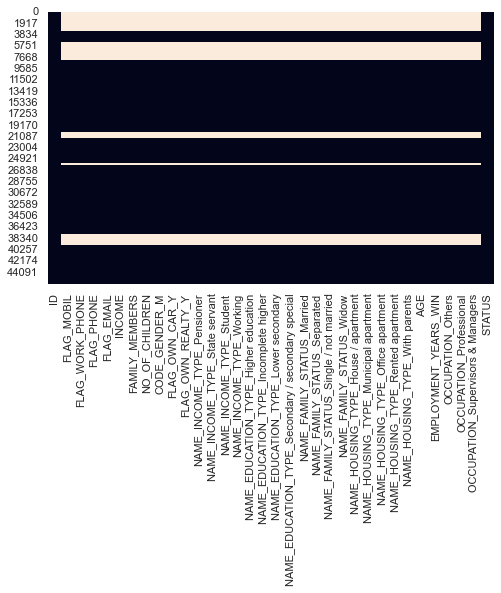

In [58]:
#visualise the nul values
fig = plt.figure(figsize = (8,5))
sns.heatmap(merge_dataset.isnull(),cbar=False)

In [59]:
#drop the nul value rows
merge_dataset.dropna(inplace = True)

In [60]:
merge_dataset

,ID,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,INCOME,FAMILY_MEMBERS,NO_OF_CHILDREN,CODE_GENDER_M,FLAG_OWN_CAR_Y,...,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,AGE,EMPLOYMENT_YEARS_WIN,OCCUPATION_Others,OCCUPATION_Professional,OCCUPATION_Supervisors & Managers,STATUS
3231,5008804,1.0,1.0,0.0,0.0,360000.0,2.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,33.0,12.0,1.0,0.0,0.0,1
3232,5008805,1.0,1.0,0.0,0.0,360000.0,2.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,33.0,12.0,1.0,0.0,0.0,1
3233,5008806,1.0,0.0,0.0,0.0,112500.0,2.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,59.0,3.0,0.0,0.0,0.0,0
3234,5008808,1.0,0.0,1.0,1.0,270000.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,52.0,8.0,0.0,0.0,0.0,0
3235,5008809,1.0,0.0,1.0,1.0,270000.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,52.0,8.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45980,5150482,1.0,0.0,0.0,0.0,157500.0,3.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,30.0,5.0,0.0,0.0,0.0,0
45981,5150483,1.0,0.0,0.0,0.0,157500.0,3.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,30.0,5.0,0.0,0.0,0.0,0
45982,5150484,1.0,0.0,0.0,0.0,157500.0,3.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,30.0,5.0,0.0,0.0,0.0,0
45983,5150485,1.0,0.0,0.0,0.0,157500.0,3.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,30.0,5.0,0.0,0.0,0.0,0


In [61]:
#drop ID column
merge_dataset.drop(['ID'],axis =1,inplace= True)

In [62]:
merge_dataset.isna().sum()

FLAG_MOBIL                                           0
FLAG_WORK_PHONE                                      0
FLAG_PHONE                                           0
FLAG_EMAIL                                           0
INCOME                                               0
FAMILY_MEMBERS                                       0
NO_OF_CHILDREN                                       0
CODE_GENDER_M                                        0
FLAG_OWN_CAR_Y                                       0
FLAG_OWN_REALTY_Y                                    0
NAME_INCOME_TYPE_Pensioner                           0
NAME_INCOME_TYPE_State servant                       0
NAME_INCOME_TYPE_Student                             0
NAME_INCOME_TYPE_Working                             0
NAME_EDUCATION_TYPE_Higher education                 0
NAME_EDUCATION_TYPE_Incomplete higher                0
NAME_EDUCATION_TYPE_Lower secondary                  0
NAME_EDUCATION_TYPE_Secondary / secondary special    0
NAME_FAMIL

In [63]:
merge_dataset.to_csv('merge_dataset.csv')

### Splitting the Dataset

In [50]:
X = merge_dataset.drop(['STATUS'],axis =1)

In [51]:
y = merge_dataset.STATUS

In [52]:
X

,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,INCOME,FAMILY_MEMBERS,NO_OF_CHILDREN,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,...,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,AGE,EMPLOYMENT_YEARS_WIN,OCCUPATION_Others,OCCUPATION_Professional,OCCUPATION_Supervisors & Managers
3231,1.0,1.0,0.0,0.0,360000.0,2.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,33.0,12.0,1.0,0.0,0.0
3232,1.0,1.0,0.0,0.0,360000.0,2.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,33.0,12.0,1.0,0.0,0.0
3233,1.0,0.0,0.0,0.0,112500.0,2.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,59.0,3.0,0.0,0.0,0.0
3234,1.0,0.0,1.0,1.0,270000.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,52.0,8.0,0.0,0.0,0.0
3235,1.0,0.0,1.0,1.0,270000.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,52.0,8.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45980,1.0,0.0,0.0,0.0,157500.0,3.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,30.0,5.0,0.0,0.0,0.0
45981,1.0,0.0,0.0,0.0,157500.0,3.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,30.0,5.0,0.0,0.0,0.0
45982,1.0,0.0,0.0,0.0,157500.0,3.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,30.0,5.0,0.0,0.0,0.0
45983,1.0,0.0,0.0,0.0,157500.0,3.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,30.0,5.0,0.0,0.0,0.0


In [53]:
y

3231     1
3232     1
3233     0
3234     0
3235     0
        ..
45980    0
45981    0
45982    0
45983    0
45984    0
Name: STATUS, Length: 36457, dtype: int64

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123,stratify=y)

In [55]:
X_train

,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,INCOME,FAMILY_MEMBERS,NO_OF_CHILDREN,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,...,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,AGE,EMPLOYMENT_YEARS_WIN,OCCUPATION_Others,OCCUPATION_Professional,OCCUPATION_Supervisors & Managers
45887,1.0,0.0,0.0,0.0,112500.0,2.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,54.0,0.0,1.0,0.0,0.0
13031,1.0,1.0,1.0,0.0,225000.0,3.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,42.0,1.0,0.0,1.0,0.0
13735,1.0,0.0,0.0,0.0,135000.0,2.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,55.0,14.0,0.0,0.0,0.0
34473,1.0,0.0,0.0,0.0,202500.0,4.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,37.0,7.0,0.0,0.0,0.0
43595,1.0,1.0,0.0,0.0,135000.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,53.0,5.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26336,1.0,0.0,0.0,0.0,135000.0,2.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,48.0,12.0,0.0,0.0,0.0
8245,1.0,0.0,0.0,0.0,270000.0,2.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,46.0,1.0,0.0,0.0,0.0
13095,1.0,0.0,1.0,0.0,180000.0,4.0,2.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,34.0,16.0,0.0,1.0,0.0
24395,1.0,0.0,0.0,0.0,99000.0,2.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,62.0,0.0,1.0,0.0,0.0


In [56]:
X_test

,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,INCOME,FAMILY_MEMBERS,NO_OF_CHILDREN,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,...,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,AGE,EMPLOYMENT_YEARS_WIN,OCCUPATION_Others,OCCUPATION_Professional,OCCUPATION_Supervisors & Managers
45967,1.0,0.0,0.0,0.0,112500.0,3.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,39.0,1.0,0.0,0.0,0.0
26929,1.0,0.0,0.0,0.0,99000.0,2.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,27.0,2.0,0.0,0.0,1.0
32557,1.0,0.0,1.0,0.0,247500.0,2.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,44.0,13.0,1.0,0.0,0.0
44356,1.0,0.0,0.0,0.0,202500.0,2.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,44.0,2.0,0.0,0.0,0.0
24342,1.0,0.0,0.0,0.0,135000.0,2.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,42.0,9.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27939,1.0,0.0,0.0,0.0,76500.0,2.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,43.0,1.0,0.0,0.0,0.0
14116,1.0,0.0,1.0,0.0,256500.0,3.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,48.0,4.0,0.0,0.0,1.0
33295,1.0,0.0,1.0,0.0,112500.0,2.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,29.0,8.0,0.0,0.0,0.0
4690,1.0,0.0,0.0,0.0,180000.0,2.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,34.0,2.0,0.0,0.0,0.0


In [57]:
y_train

45887    0
13031    0
13735    0
34473    1
43595    0
        ..
26336    1
8245     0
13095    0
24395    0
11159    0
Name: STATUS, Length: 27342, dtype: int64

In [58]:
y_test

45967    1
26929    0
32557    0
44356    0
24342    1
        ..
27939    0
14116    0
33295    0
4690     0
28334    0
Name: STATUS, Length: 9115, dtype: int64

### FEATURE SCALING

### Option-1

In [59]:
#NORMALIZATION
scaler = MinMaxScaler()

### Option-2

In [60]:
#STANDARDIZATION
# scaler = StandardScaler()

In [61]:
X_train_scaled =pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

### Handling Imbalanced Data

### Option-1

In [63]:
ros = RandomOverSampler(sampling_strategy = 'not majority')
X_res,y_res = ros.fit_resample(X_train,y_train)

### Option-2

In [64]:
# sm = SMOTENC(random_state=123, categorical_features=[31])
# X_res, y_res = sm.fit_resample(X_train_scaled,y_train)

In [65]:
y_res

0        0
1        0
2        0
3        1
4        0
        ..
48243    1
48244    1
48245    1
48246    1
48247    1
Name: STATUS, Length: 48248, dtype: int64

### Feature Selection

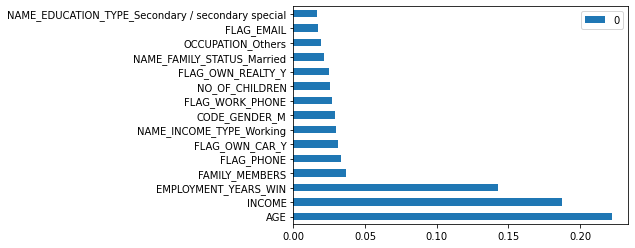

In [66]:
best = RandomForestClassifier()
best_fi = best.fit(X_res, y_res)
df_best_fi = pd.DataFrame(best_fi.feature_importances_,index=X_res.columns)
df_best_fi.nlargest(15,df_best_fi.columns).plot(kind='barh')
plt.show()

In [69]:
# X_res_best = X_res[['age','INCOME','winsorize_employed','FLAG_OWN_REALTY_Y','FLAG_OWN_CAR_Y','FLAG_PHONE','CODE_GENDER_M','NAME_INCOME_TYPE_Working','NAME_FAMILY_STATUS_Married','FLAG_WORK_PHONE']]

X_res_best = X_res[['AGE','INCOME','EMPLOYMENT_YEARS_WIN','FLAG_OWN_REALTY_Y','FLAG_OWN_CAR_Y','FLAG_PHONE','CODE_GENDER_M','NAME_INCOME_TYPE_Working','NAME_FAMILY_STATUS_Married','FLAG_WORK_PHONE','NAME_EDUCATION_TYPE_Higher education','NAME_EDUCATION_TYPE_Secondary / secondary special','FAMILY_MEMBERS','NO_OF_CHILDREN','FLAG_EMAIL']]

In [70]:
# X_test = X_test[['age','INCOME','winsorize_employed','FLAG_OWN_REALTY_Y','FLAG_OWN_CAR_Y','FLAG_PHONE','CODE_GENDER_M','NAME_INCOME_TYPE_Working','NAME_FAMILY_STATUS_Married','FLAG_WORK_PHONE']]

X_test_best = X_test[['AGE','INCOME','EMPLOYMENT_YEARS_WIN','FLAG_OWN_REALTY_Y','FLAG_OWN_CAR_Y','FLAG_PHONE','CODE_GENDER_M','NAME_INCOME_TYPE_Working','NAME_FAMILY_STATUS_Married','FLAG_WORK_PHONE','NAME_EDUCATION_TYPE_Higher education','NAME_EDUCATION_TYPE_Secondary / secondary special','FAMILY_MEMBERS','NO_OF_CHILDREN','FLAG_EMAIL']]

In [71]:
X_res_best

,AGE,INCOME,EMPLOYMENT_YEARS_WIN,FLAG_OWN_REALTY_Y,FLAG_OWN_CAR_Y,FLAG_PHONE,CODE_GENDER_M,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Married,FLAG_WORK_PHONE,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,FAMILY_MEMBERS,NO_OF_CHILDREN,FLAG_EMAIL
0,54.0,112500.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0
1,42.0,225000.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0,0.0
2,55.0,135000.0,14.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0
3,37.0,202500.0,7.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,0.0
4,53.0,135000.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48243,49.0,225000.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
48244,62.0,292500.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
48245,44.0,247500.0,9.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,1.0,0.0
48246,65.0,99000.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0


### Model Selection

In [72]:
# clf = KNeighborsClassifier()    #Lowest
# clf = RandomForestClassifier()  #Same
# clf = ExtraTreesClassifier()    #Same
clf = DecisionTreeClassifier()    #Hightest


clf.fit(X_res_best, y_res)

DecisionTreeClassifier()

In [73]:
predicted= clf.predict(X_test_best)

### Evaluation of Model

In [74]:
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.7891387822270982


In [75]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      8042
           1       0.30      0.62      0.41      1073

    accuracy                           0.79      9115
   macro avg       0.62      0.71      0.64      9115
weighted avg       0.87      0.79      0.82      9115



In [76]:
auc = metrics.roc_auc_score(y_test, predicted)
auc

0.7137289829513416

In [77]:
print(confusion_matrix(y_test, predicted))

[[6533 1509]
 [ 413  660]]


In [187]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 200, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [50, 65, 80, 95, 110, 125, 140, 155, 170, 185, 200], 'min_samples_split': [5, 10, 15], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [188]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 75, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_res_best, y_res)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 43.4min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed: 79.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=75,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [50, 65, 80, 95, 110, 125,
                                                      140, 155, 170, 185, 200],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [5, 10, 15],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, verbose=2)

In [189]:
rf_random.best_params_

{'n_estimators': 733,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 140,
 'bootstrap': False}

In [190]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=140, max_features='sqrt',
                      min_samples_split=5, n_estimators=733)

In [191]:
rf_random.best_score_

0.012039084609565412

In [233]:
clf_tune = DecisionTreeClassifier(
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_features = 'sqrt',
 max_depth= 140,
)

clf_tune.fit(X_res_best, y_res)

DecisionTreeClassifier(max_depth=140, max_features='sqrt', min_samples_split=5)

In [234]:
predicted= clf_tune.predict(X_test_best)

In [235]:
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.7897970378496983


In [236]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      8042
           1       0.30      0.61      0.41      1073

    accuracy                           0.79      9115
   macro avg       0.62      0.71      0.64      9115
weighted avg       0.87      0.79      0.82      9115



In [237]:
auc = metrics.roc_auc_score(y_test, predicted)
auc

0.7120829763035768

In [238]:
print(confusion_matrix(y_test, predicted))

[[6544 1498]
 [ 418  655]]
